Hi các bạn, cũng đã đến những buổi cuối cùng của lớp Python Private, chúng ta đã đi qua nhiều kiến thức cơ bản cũng như các thư viện hữu dụng cho hướng phát triển của lớp sau này, bài tập này là bài tập tổng hợp lại kiến thức cho các bạn trước khi bước vào bài tập lớn cuối khóa nhé.

Yêu cầu chung cho bài tập như sau:
- Tạo folder finalHomework trên drive của mình, tạo bản sao từ google colab này và lưu lại trong đó
- Ở các vị trị có dấu ... các bạn sẽ thay thế nó bằng câu lệnh phù hợp nhé
- Có thể thêm cell code để tách rời các đoạn code cho rõ ràng hơn
- Link dataset:
  + Fifa World Cup 2022 Qatar: [data](https://drive.google.com/drive/folders/1toqv_FTlsi6-NfswfzKnK9GBYAE8i57L?usp=sharing)

Anh mong các bạn sẽ làm bài tập đầy đủ để có thể review lại kiến thức của bản thân nhé !!!

Yêu các bạn <3



# Set up

## Import các thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

## Kết nối với google drive

In [68]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## Di chuyển đến thư mục chứa google colab

In [ ]:
import shutil
import os

# Đường dẫn tới notebook hiện tại
current_notebook_path = '/content/drive/MyDrive/Copy_finalHomework.ipynb'

# Đường dẫn đến folder finalHomework
destination_path = '/content/drive/MyDrive/finalHomework/'

# Sao chép notebook vào folder
shutil.copy(current_notebook_path, destination_path)
print(f'Đã sao chép notebook vào {destination_path}.')

Đã sao chép notebook vào /content/drive/MyDrive/finalHomework/.


## Upload file

In [ ]:
from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
  print(f"Tep tin {file_name} da duoc tai len.")

Saving matches_world_cup_2022_catar.csv to matches_world_cup_2022_catar.csv
Tep tin matches_world_cup_2022_catar.csv da duoc tai len.


## List các file trong thư mục

In [ ]:
import os

folder_path = '/content/drive/MyDrive/finalHomework/'

files_in_folder = os.listdir(folder_path)

print(f"Danh sach cac tep tin trong folder {folder_path}: ")
for file_name in files_in_folder:
  print(file_name)

Danh sach cac tep tin trong folder /content/drive/MyDrive/finalHomework/: 
Copy_finalHomework.ipynb


# Numpy

In [ ]:
# Init
import random
import numpy as np

prices = list(range(1, 1000000))
random.shuffle(prices)

In [ ]:
# hàm ban đầu
def find_max_down_fall(prices):
  min_right_to_left = [0 for i in range((len(prices)))]

  min_so_far = float('inf')
  for i in range(len(prices) -1, -1, -1):
    min_so_far = min(prices[i], min_so_far)
    min_right_to_left[i] = min_so_far

  res = 0
  for i, buy in enumerate(prices):
    worst_sell = min_right_to_left[i]
    down_fall = (buy - worst_sell) / buy
    res = max(res, down_fall)

  return res

In [ ]:
# Tính thời gian thực hiện của hàm find_max_down_fall
%timeit find_max_down_fall(prices)

1.04 s ± 233 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# hàm sau khi được viết lại bằng numpy
def find_max_down_fall_np(prices_np):
  # start your code here
  min_right_to_left = np.minimum.accumulate(prices[::-1])[::-1]
  down_fall = (prices - min_right_to_left) / prices
  return np.max(down_fall)
  # end your code

In [ ]:
# Tính thời gian thực hiện của hàm find_max_down_fall sau khi được viết lại bằng numpy với thời gian kì vọng nhanh hơn khoảng 100 lần
# start your code here
prices_np = np.array([prices])
# end your code

%timeit find_max_down_fall_np(prices_np)

456 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# so sánh kết quả
find_max_down_fall(prices) == find_max_down_fall_np(prices_np)

True

# Pandas + Matplotlib

## Gọi file csv

In [ ]:
from pandas import json_normalize

df_matches = pd.read_csv('matches_world_cup_2022_catar.csv')
# df = pd.DataFrame(df_matches['events_list'])
# df_events = json_normalize(df['events_list'].apply(eval).explode())
df_events = df_matches[['match_id', 'team_name_home',	'team_name_away', 'events_list']]

## Hiển thị 5 dòng đầu của dataframe

In [ ]:
print(df_matches.head())

print(df_events.head())

   match_id                  stage        date   pens pens_home_score  \
0         1                  Final  18/12/2022   True               4   
1         2  Match for third place  17/12/2022  False           False   
2         3            Semi-finals  14/12/2022  False           False   
3         4            Semi-finals  13/12/2022  False           False   
4         5         Quarter-finals  10/12/2022  False           False   

  pens_away_score team_name_home team_name_away  team_home_score  \
0               2      Argentina         France                3   
1           False        Croatia        Morocco                2   
2           False         France        Morocco                2   
3           False      Argentina        Croatia                3   
4           False        England         France                1   

   team_away_score  ...  prediction_team_away_win  prediction_quantity  \
0                3  ...                      0.33              1002364   
1   

## Hiển thị 5 dòng cuối của các dataframe

In [ ]:
print(df_matches.tail())

print(df_events.tail())

    match_id                    stage        date   pens pens_home_score  \
59        60  Group stage: Matchday 1  22/11/2022  False           False   
60        61  Group stage: Matchday 1  21/11/2022  False           False   
61        62  Group stage: Matchday 1  21/11/2022  False           False   
62        63  Group stage: Matchday 1  21/11/2022  False           False   
63        64  Group stage: Matchday 1  20/11/2022  False           False   

   pens_away_score team_name_home team_name_away  team_home_score  \
59           False      Argentina   Saudi Arabia                1   
60           False            USA          Wales                1   
61           False        Senegal    Netherlands                0   
62           False        England           Iran                6   
63           False          Qatar        Ecuador                0   

    team_away_score  ...  prediction_team_away_win  prediction_quantity  \
59                2  ...                      0.04   

## In ra thông tin của từng dataframe

In [ ]:
print(f"Thong tin cua df_matches: {df_matches.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match_id                  64 non-null     int64  
 1   stage                     64 non-null     object 
 2   date                      64 non-null     object 
 3   pens                      64 non-null     bool   
 4   pens_home_score           64 non-null     object 
 5   pens_away_score           64 non-null     object 
 6   team_name_home            64 non-null     object 
 7   team_name_away            64 non-null     object 
 8   team_home_score           64 non-null     int64  
 9   team_away_score           64 non-null     int64  
 10  possession_home           64 non-null     float64
 11  possession_away           64 non-null     float64
 12  total_shots_home          64 non-null     int64  
 13  total_shots_away          64 non-null     int64  
 14  shots_on_tar

In [ ]:
print(f"Thong tin cua df_events: {df_events.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   event_team       1043 non-null   object
 1   event_time       1043 non-null   object
 2   event_type       1043 non-null   object
 3   action_player_1  1002 non-null   object
 4   action_player_2  730 non-null    object
 5   event_result     41 non-null     object
 6   event_player     41 non-null     object
dtypes: object(7)
memory usage: 57.2+ KB
Thong tin cua df_events: None


- Hãy kiểm tra xem các data frame có giá trị null không
- Nếu có hãy trình bày cách giải quyết của bản thân đối với dữ liệu null đó, và code cách giải quyết dưới cell code bên dưới
- Nếu không có cách giải quyết thì cũng ghi là không có cách giải quyết


Ghi cách giải quyết của bản thân vào đây: ...

In [ ]:
# Kiem tra xem cac data frame co gia tri null hay khong
print("Cac gia tri null trong df_mathes: ")
print(df_matches.isnull().sum())

print("Cac gia tri null trong df_events: ")
print(df_events.isnull().sum())

Cac gia tri null trong df_mathes: 
match_id                    0
stage                       0
date                        0
pens                        0
pens_home_score             0
pens_away_score             0
team_name_home              0
team_name_away              0
team_home_score             0
team_away_score             0
possession_home             0
possession_away             0
total_shots_home            0
total_shots_away            0
shots_on_target_home        0
shots_on_target_away        0
duels_won_home              0
duels_won_away              0
prediction_team_home_win    0
prediction_draw             0
prediction_team_away_win    0
prediction_quantity         0
location                    0
events_list                 0
lineup_home                 0
lineup_away                 0
player_names_home           0
player_numbers_home         0
player_names_away           0
player_numbers_away         0
dtype: int64
Cac gia tri null trong df_events: 
event_team       

## Lấy ra các trận đấu có từ 3 bàn thắng trở lên (ghi ra tên cặp đấu)

In [ ]:
df_matches['sum_of_scores'] = df_matches['team_away_score'] + df_matches['team_home_score']
print(df_matches.loc[(df_matches['team_away_score'] + df_matches['team_home_score'] >= 3), ['team_name_home', 'team_name_away', 'sum_of_scores']])

   team_name_home team_name_away  sum_of_scores
0       Argentina         France              6
1         Croatia        Morocco              3
3       Argentina        Croatia              3
4         England         France              3
6     Netherlands      Argentina              4
8        Portugal    Switzerland              7
10         Brazil    South Korea              5
12        England        Senegal              3
13         France         Poland              4
14      Argentina      Australia              3
15    Netherlands            USA              4
17         Serbia    Switzerland              5
18    South Korea       Portugal              3
20          Japan          Spain              3
21     Costa Rica        Germany              6
23         Canada        Morocco              3
25   Saudi Arabia         Mexico              3
28          Wales        England              3
31        Ecuador        Senegal              3
34    South Korea          Ghana        

## Thống kê các sân vận động diễn ra các trận đấu và hiển thị tỷ lệ phần trăm của các sân vận động bằng biểu đồ thích hợp

                        location  frequency
0          Lusail Iconic Stadium         10
1                Al Bayt Stadium          9
2  Khalifa International Stadium          8
3             Al Thumama Stadium          8
4         Education City Stadium          8
5                    Stadium 974          7
6              Al Janoub Stadium          7
7          Ahmad bin Ali Stadium          7


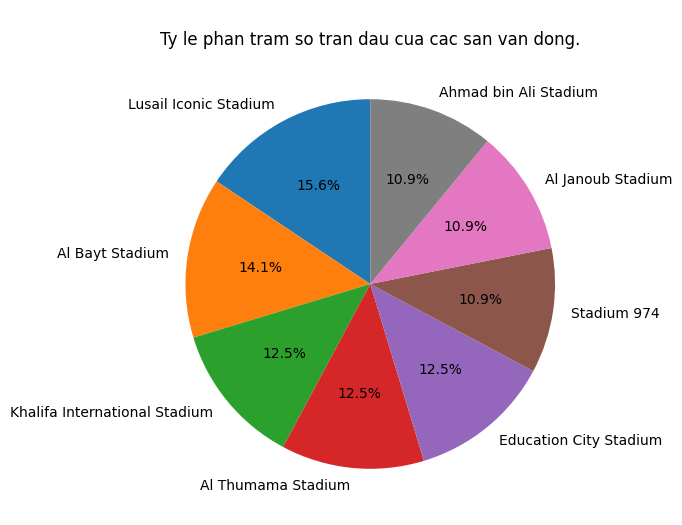

In [ ]:
stadium_counts = df_matches['location'].value_counts()
df_stadium_counts = pd.DataFrame({'location': stadium_counts.index, 'frequency': stadium_counts.values})
print(df_stadium_counts)

plt.figure(figsize=(8, 6))
stadium_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("\nTy le phan tram so tran dau cua cac san van dong.")
plt.ylabel('')
plt.show()

## Lấy ra tên của các đội tham dự giải đấu

In [ ]:
df_matches['team'] = df_matches[['team_name_home', 'team_name_away']].stack().reset_index(drop=True)
print(df_matches['team'].drop_duplicates())

0        Argentina
1           France
2          Croatia
3          Morocco
8          England
11        Portugal
12     Netherlands
15          Brazil
17     Switzerland
19           Spain
21     South Korea
22           Japan
25         Senegal
27          Poland
29       Australia
31             USA
32        Cameroon
34          Serbia
38           Ghana
39         Uruguay
42      Costa Rica
43         Germany
45         Belgium
46          Canada
50    Saudi Arabia
51          Mexico
52         Tunisia
55         Denmark
56           Wales
58            Iran
61           Qatar
62         Ecuador
Name: team, dtype: object


## Lấy ra số bàn thắng được ghi bởi các đội

In [ ]:
df_scores = pd.concat([df_matches[['team_name_home', 'team_home_score']], df_matches[['team_name_away', 'team_away_score']].rename(columns={'team_name_away': 'team_name_home', 'team_away_score': 'team_home_score'})], ignore_index=True)
team_scores = df_scores.groupby('team_name_home')['team_home_score'].sum().reset_index()
team_scores = team_scores.rename(columns={'team_name_home': 'team', 'team_home_score': 'team_scores'})
print(team_scores)

            team  team_scores
0      Argentina           15
1      Australia            4
2        Belgium            1
3         Brazil            8
4       Cameroon            4
5         Canada            2
6     Costa Rica            3
7        Croatia            8
8        Denmark            1
9        Ecuador            4
10       England           13
11        France           16
12       Germany            6
13         Ghana            5
14          Iran            4
15         Japan            5
16        Mexico            2
17       Morocco            6
18   Netherlands           10
19        Poland            3
20      Portugal           12
21         Qatar            1
22  Saudi Arabia            3
23       Senegal            5
24        Serbia            5
25   South Korea            5
26         Spain            9
27   Switzerland            5
28       Tunisia            1
29           USA            3
30       Uruguay            2
31         Wales            1


## Vẽ biểu đồ thể hiện số bàn thắng được ghi bởi mỗi đội (tự chọn kiểu biểu đồ phù hợp)

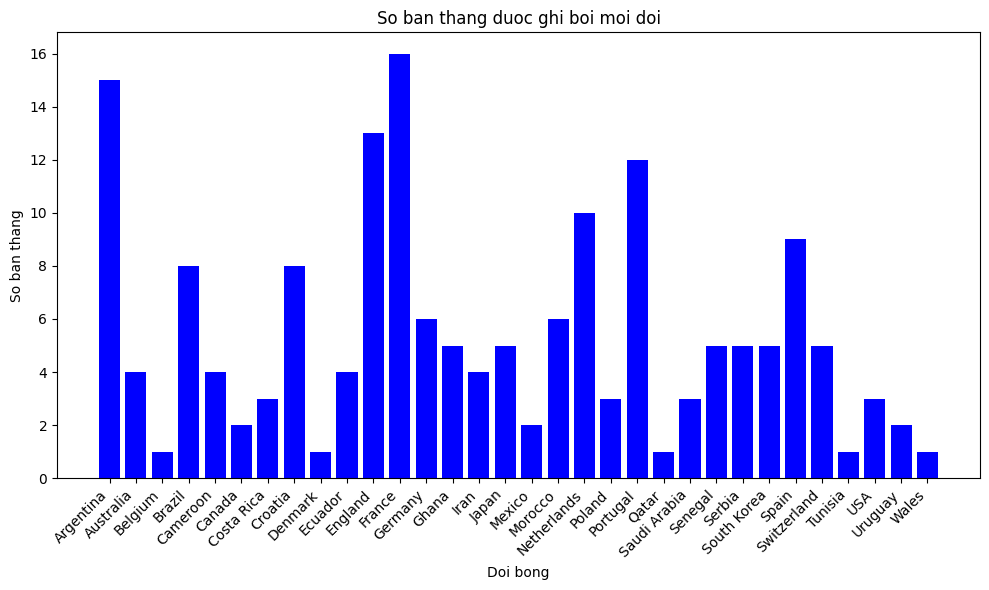

In [ ]:
# plt.figure(figsize=(8, 8))
# plt.pie(team_scores['team_scores'], labels=team_scores['team'], autopct='%1.1f%%', startangle=90)
# plt.title('Ty le so ban thang cua moi doi')
# plt.axis('equal')
# plt.show()

# Bieu do cot
plt.figure(figsize=(10, 6))
plt.bar(team_scores['team'], team_scores['team_scores'], color='blue')
plt.xlabel('Doi bong')
plt.ylabel('So ban thang')
plt.title('So ban thang duoc ghi boi moi doi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##Thống kê số lượng bàn thắng được ghi bởi các cầu thủ Argentina bằng biểu đồ tròn

- Yêu cầu phải có tiêu đề cho biểu đồ, chú thích
- Có tỷ lệ phần trăm cho từng cầu thủ
- Tách phần của Alexis Mac Allister ra khỏi biểu đồ

<ipython-input-31-a0025069610e>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Ar_goals_count = pd.Series()
<ipython-input-31-a0025069610e>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Ar_assists_count = pd.Series()


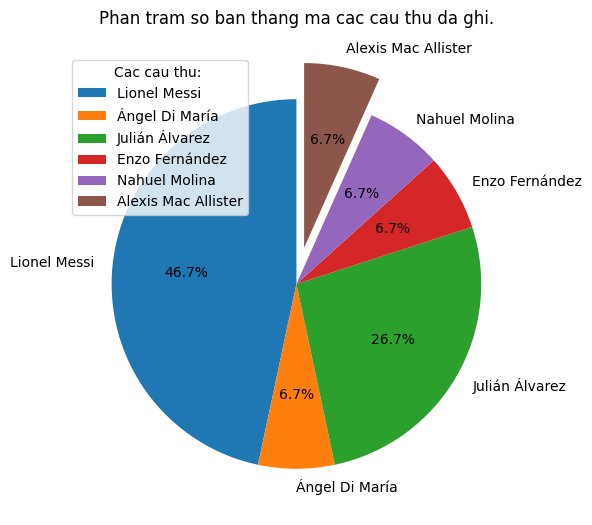

In [ ]:
teams = ['home', 'away']
Ar_goals_count = pd.Series()
Ar_assists_count = pd.Series()
matches = df_events

for team in teams:
  matches = df_events[df_events['team_name_' + team] == 'Argentina']
  events_list = matches['events_list'].apply(eval)
  for events in events_list:
    for event in events:
      if event['event_team'] == team and event['event_type'] in ['Penalty', 'Goal']:
        Ar_player_name = event['action_player_1'].strip()
        Ar_goals_count[Ar_player_name] = Ar_goals_count.get(Ar_player_name, 0) + 1

myexplode = [0, 0, 0, 0, 0, 0.2]

plt.figure(figsize=(8, 6))
Ar_goals_count.plot(kind='pie', explode=myexplode , autopct='%1.1f%%', startangle=90)
plt.title("Phan tram so ban thang ma cac cau thu da ghi.\n")
plt.ylabel('')
plt.legend(title="Cac cau thu: ")
plt.show()

## Thống kê tỷ lệ ra sân của các cầu thủ Pháp bằng biểu đồ

<ipython-input-19-b149f1eb8441>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  num_of_appear = pd.Series()


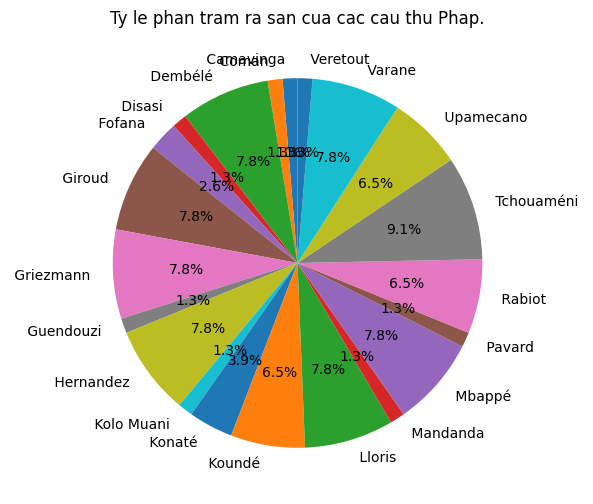

In [ ]:
num_of_appear = pd.Series()
for team in teams:
  matches = df_matches[df_matches['team_name_' + team] == 'France']
  all_lineup = matches['lineup_' + team].apply(eval).explode('lineup_' + team)
  num_counts = all_lineup.str.get('player_name').value_counts()
  num_of_appear = num_of_appear.add(num_counts, fill_value=0).astype(int)

plt.figure(figsize=(8, 6))
num_of_appear.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Ty le phan tram ra san cua cac cau thu Phap.")
plt.ylabel('')
plt.show()


## Thống kê danh sách top 10 vua phá lưới của giải đấu
- Nếu trường hợp hai cầu thủ có cùng số bàn thắng thì chọn cầu thủ có số lượng kiến tạo nhiều hơn
- Sử dụng biểu đồ thích hợp để hiển thị số bàn thắng của top 10

In [ ]:
goals_count = pd.Series()
assists_count = pd.Series()

for team in teams:
  events_list = matches['events_list'].apply(eval)
  for events in events_list:
    for event in events:
      if event['event_team'] == team and event['event_type'] in ['Penalty', 'Goal']:
        player_name = event['action_player_1'].strip()
        goals_count[player_name] = goals_count.get(player_name, 0) + 1

      if event['event_type'] == 'Goal' and 'action_player_2' in event:
        assists_player_name = event['action_player_2'].strip()
        assists_count[assists_player_name] = assists_count.get(assists_player_name, 0) + 1

top10 = pd.concat([goals_count, assists_count], axis=1).sort_values(by=[0, 1], ascending=False).head(10)
print(top10)

                     0   1
Wout Weghorst        2 NaN
Nahuel Molina        1 NaN
Lionel Messi         1 NaN
Alexis Mac Allister  1 NaN
Julián Álvarez       1 NaN


<ipython-input-34-6794a1237705>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  goals_count = pd.Series()
<ipython-input-34-6794a1237705>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  assists_count = pd.Series()


# OpenCV

## Tìm bounding box cho các chữ số trong bức ảnh sau: [ảnh](https://1.bp.blogspot.com/-fGR7t6RnXZs/Uv5kdmT89_I/AAAAAAAAAjg/zZHfaCqnkak/s1600/freeDrawExport_012314055352.png)

- Gợi ý các hàm sử dụng:
  - cv2.threshold
  - cv2.findContours
  - cv2.contourArea
  - cv2.boundingRect

Và các hàm trong thư viện OpenCV đã học hôm trước

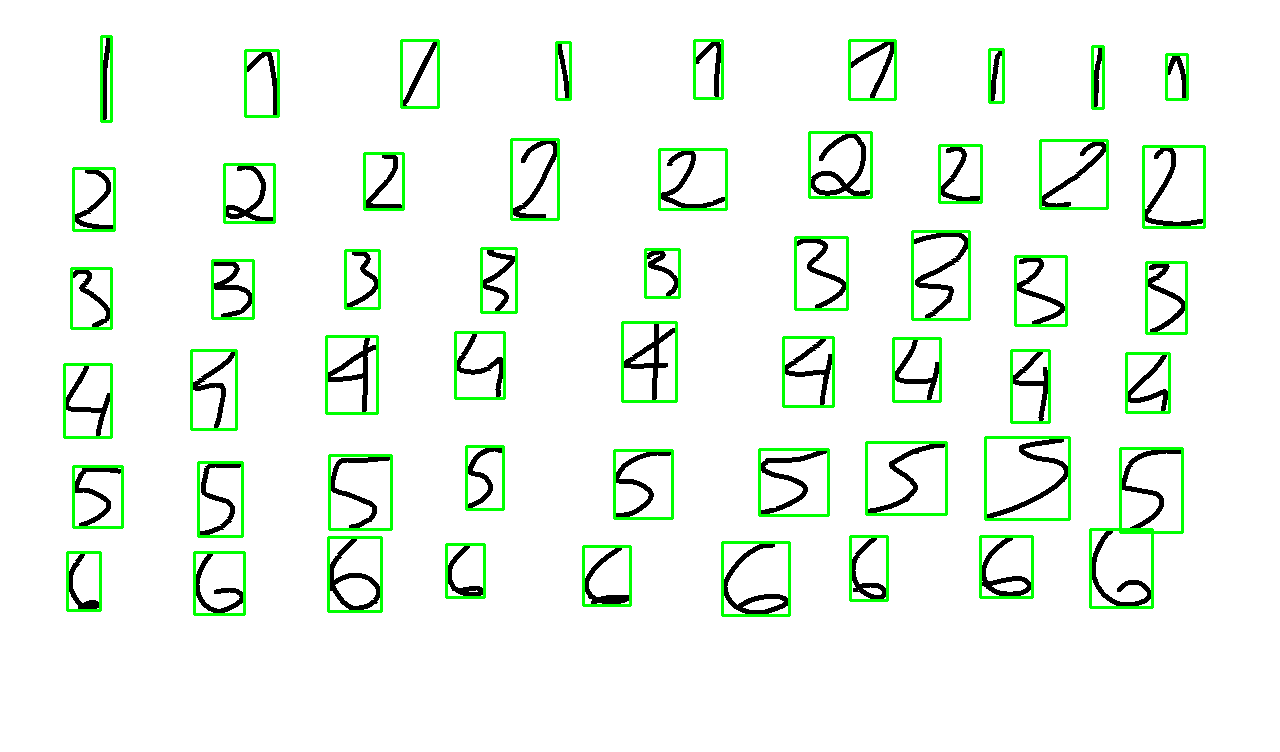

In [ ]:
# Doc anh
image = cv2.imread('/content/drive/MyDrive/finalHomework/freeDrawExport_012314055352.png')

# Chuyen sang anh den trang
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Ap dung GaussianBlur de giam nhieu va lam min anh
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Su dung ham Canny de phat hien canh
edges = cv2.Canny(blur, 50, 150)

# Tim contour tronganh da xu ly
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Duyet qua tat ca cac contour va ve bounding box
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Thực hiện vẽ logo của CLB Tin Học HIT bằng OpenCV: [Vẽ logo](https://docs.google.com/document/d/1Wfg10lmyVPzGpCa6BWcMd3fpjYD3OGohoyjzy_JfcWc/edit?usp=sharing)

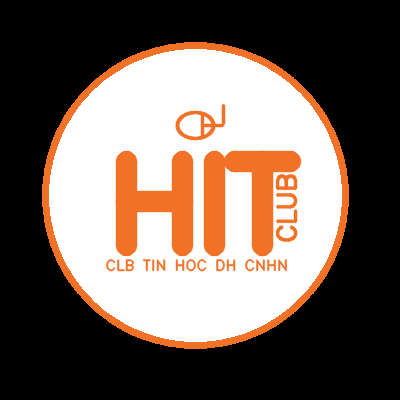

In [ ]:
logo = np.ones((400, 400, 3), dtype=np.uint8) * 0
cv2.circle(logo, (195, 195), 150, (255, 255, 255), -1)
cv2.circle(logo, (195, 195), 150, (39, 113, 241), 5)

# Chu HIT
font_scale = 4
font_thickness = 20
font_color = (39, 113, 241)
font_face = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(logo, 'HIT', (110, 245), font_face, font_scale, font_color, font_thickness, cv2.LINE_AA)


# Chu CLUB
logo = cv2.rotate(logo, cv2.ROTATE_90_CLOCKWISE)
text_side = 'CLUB'
font_scale_2 = 0.85
club_thickness = 2
cv2.putText(logo, text_side, (157, 295), font_face, font_scale_2, font_color, club_thickness, cv2.LINE_AA)
logo = cv2.rotate(logo, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Chu CLB TIN HOC DH CNHN
text_bottom = 'CLB TIN HOC DH CNHN'
font_scale_bottom = 0.5
font_thickness_bottm = 1
cv2.putText(logo, text_bottom, (105, 270), cv2.FONT_HERSHEY_DUPLEX, font_scale_bottom, font_color, font_thickness_bottm, cv2.LINE_AA)

# Chuot
axes = (13, 18)
angle = 90
start_angle = 0
end_angle = 360
thickness = 2
cv2.ellipse(logo, (195, 125), axes, angle, start_angle, end_angle, font_color, thickness, cv2.LINE_AA)

x1 = (202, 114)
y1 = (202, 137)
x2 = (202, 125)
y2 = (222, 125)
x3 = (223, 123)
y3 = (223, 105)
cv2.line(logo, x1, y1, font_color, 2, cv2.LINE_AA)
cv2.line(logo, x2, y2, font_color, 2, cv2.LINE_AA)
cv2.line(logo, x3, y3, font_color, 2, cv2.LINE_AA)

cv2_imshow(logo)
cv2.waitKey(0)
cv2.destroyAllWindows()

Thực hiện các yêu cầu sau đối với ảnh logo mà bạn vừa vẽ:
- Làm mịn ảnh
- Làm mờ ảnh

Sử dụng các hàm gợi ý sau:
- cv2.filter2D
- cv2.blur
- cv2.GaussianBlur
- cv2.medianBlur
- cv2.bilateralFilter

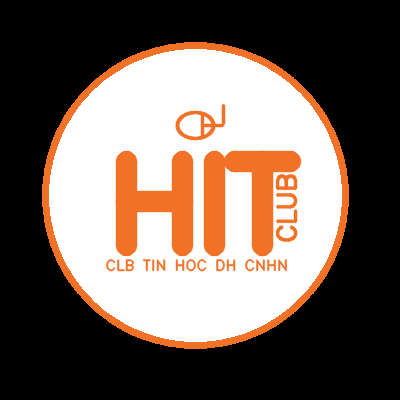

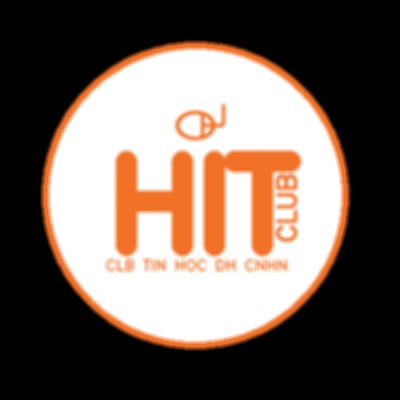

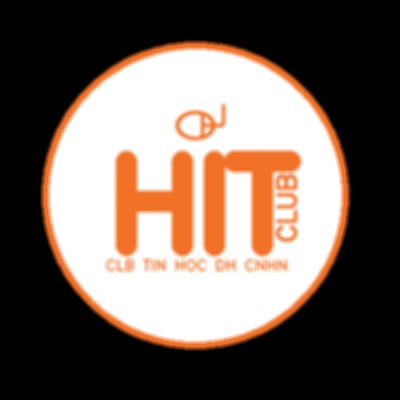

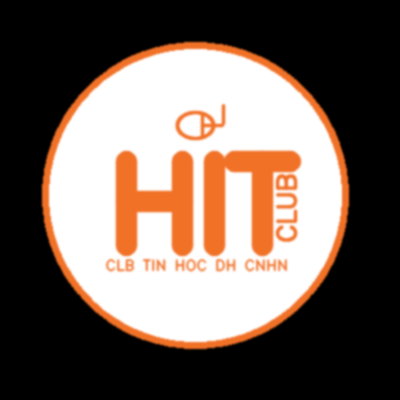

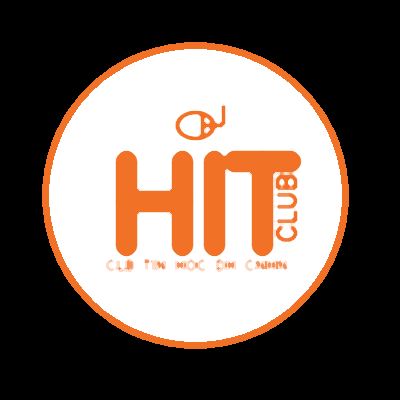

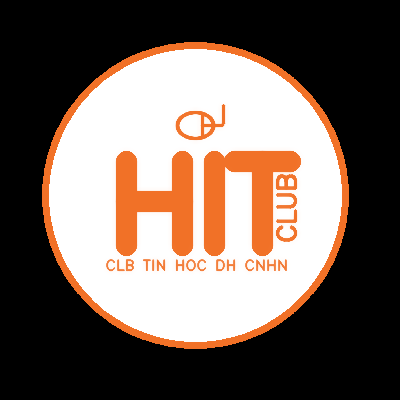

In [ ]:
# Lam min anh bang filter2D
kernel = np.ones((5, 5), np.float32) / 25
smoothed_logo_filter2D = cv2.filter2D(logo, -1, kernel)

# Lam mo anh bang ham blur
smoothed_logo_blur = cv2.blur(logo, (5, 5))

# Lam mo anh bang GaussianBlur
smoothed_logo_gaussian = cv2.GaussianBlur(logo, (5, 5), 0)

# Lam mo anh bang medianBlur
smoothed_logo_median = cv2.medianBlur(logo, 5)

# Lam mo anh bang bilateralFilter
smoothed_logo_bilateral = cv2.bilateralFilter(logo, 9, 75, 75)

cv2_imshow(logo)
cv2_imshow(smoothed_logo_filter2D)
cv2_imshow(smoothed_logo_blur)
cv2_imshow(smoothed_logo_gaussian)
cv2_imshow(smoothed_logo_median)
cv2_imshow(smoothed_logo_bilateral)

cv2.waitKey(0)
cv2.destroyAllWindows()